In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

If you want to run on your own computer, you need to change the path of data reading

In [2]:
df = pd.read_csv("/Users/dew/Desktop/iris.csv")
df.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


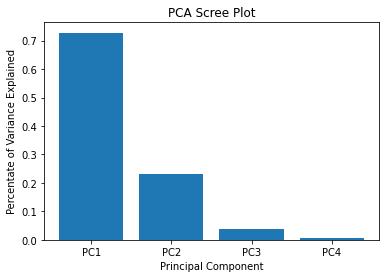

In [16]:
df1 = df.loc[:,df.columns[0:4]]
scaler = StandardScaler()
scaler.fit(df1)
scaled_df = scaler.transform(df1)
pca = PCA(n_components = 4)
pca.fit(scaled_df)
x_pca = pca.transform(scaled_df)
percent_variance=pca.explained_variance_ratio_
plt.bar(x = range(1,5),height=percent_variance,tick_label=["PC" + str(i) for i in range(1,5)])
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.savefig("PCA scree Plot.jpg")

In [23]:
df2 = pd.DataFrame(data=x_pca,columns=["PC"+str(i) for i in range(1,5)])

In [27]:
df['target']=df.loc[:,df.columns[4]]

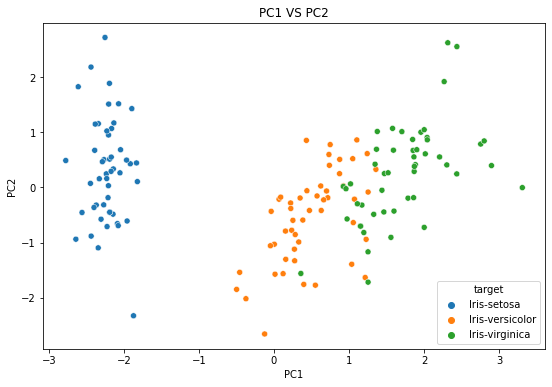

In [29]:
df3 = pd.concat([df2,df['target']],axis=1)
plt.figure(figsize=(9,6))
sns.scatterplot(x="PC1",y="PC2",hue='target',data=df3)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PC1 VS PC2")
plt.savefig("PC1 and PC2.jpg")

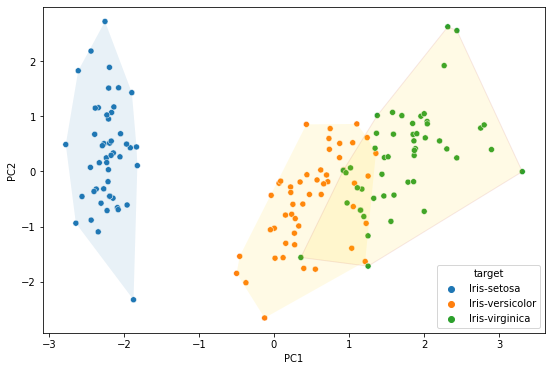

In [35]:
from matplotlib import patches
from scipy.spatial import ConvexHull
def encircle(x,y, ax=None, **kw):
    if not ax: ax=plt.gca()
    p = np.c_[x,y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    ax.add_patch(poly)
df3_1 = df3.loc[df3.target == df3.target.unique()[0],:]
df3_2 = df3.loc[df3.target == df3.target.unique()[1],:]
df3_3 = df3.loc[df3.target == df3.target.unique()[2],:]
plt.figure(figsize=(9,6))
sns.scatterplot(x="PC1",y="PC2",hue='target',data=df3)
encircle(df3_1.PC1,df3_1.PC2,alpha=0.1)
encircle(df3_2.PC1,df3_2.PC2,fc = "gold", alpha=0.1)
encircle(df3_3.PC1,df3_3.PC2,ec = "firebrick",fc = "gold", alpha=0.1)
plt.savefig("3.jpg")